In [2]:
import numpy as np
from cosmoTransitions.tunneling1D import SingleFieldInstanton
#from cosmoTransitions import generic_potential
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.integrate as integrate
import random
from scipy import interpolate, special
import seaborn as sns
from scipy import misc


%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size



####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2))
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant



class toy_potential:
    def __init__(self, Temp,Tc=100, gam=400,alph=1,lam=1):
        self.T=Temp
        self.Tc=Tc
        self.gam=gam
        self.alph=alph
        self.lam=lam
        self.Ndim = 1
        if Temp**2*alph**2 - 4*Temp**2*gam*lam + 4*Tc**2*gam*lam>=0:
            self.htrue=Temp*alph/2/lam + np.sqrt(Temp**2*alph**2 - 4*Temp**2*gam*lam + 4*Tc**2*gam*lam)/2/lam
        else:
            self.htrue=0
        
    def V0(self,phi):
        return 1/2*self.gam*(self.T**2-self.Tc**2)*phi**2 - 1/3*self.alph*self.T*phi**3 + self.lam/4*phi**4
    def DV(self,phi):
        return self.gam*(self.T**2-self.Tc**2)*phi - self.alph*self.T*phi**2 + self.lam*phi**3
    
    def D2V(self,phi):
        return self.gam*(self.T**2-self.Tc**2) - 2*self.alph*self.T*phi + 3*self.lam*phi**2
        




True vacuum is h= 0


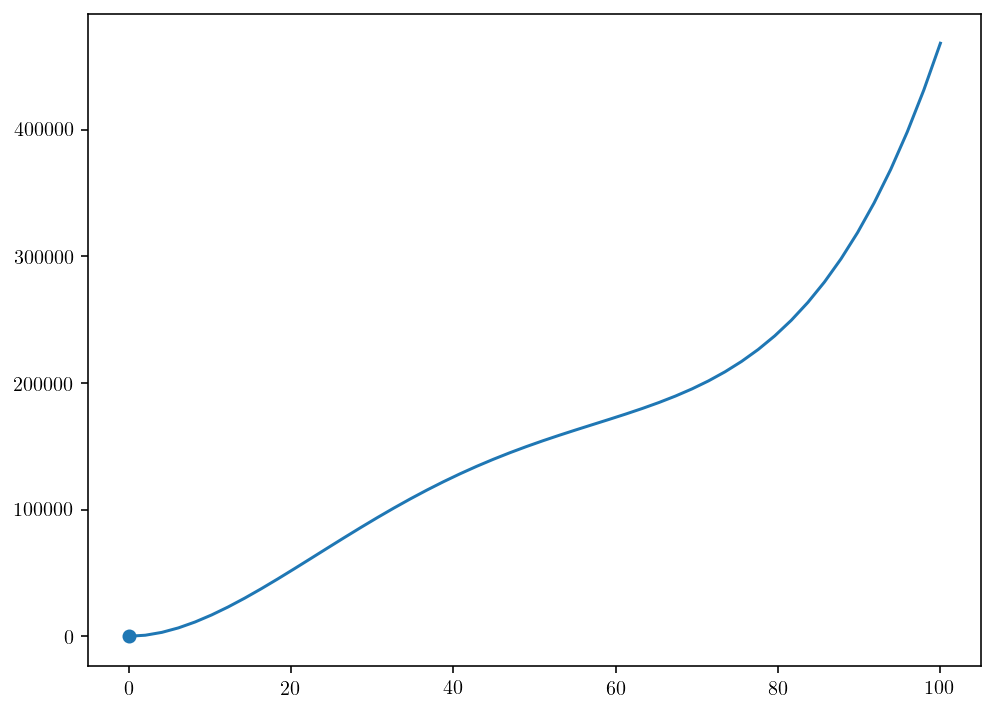

In [5]:
m=toy_potential(Temp=80.6,Tc = 50,gam= .1,alph = .15,lam = .1)

print("True vacuum is h=",m.htrue)
phi_range=np.linspace(0,100)
plt.plot(phi_range,m.V0(phi_range))
plt.scatter(m.htrue,m.V0(m.htrue))


plt.show()




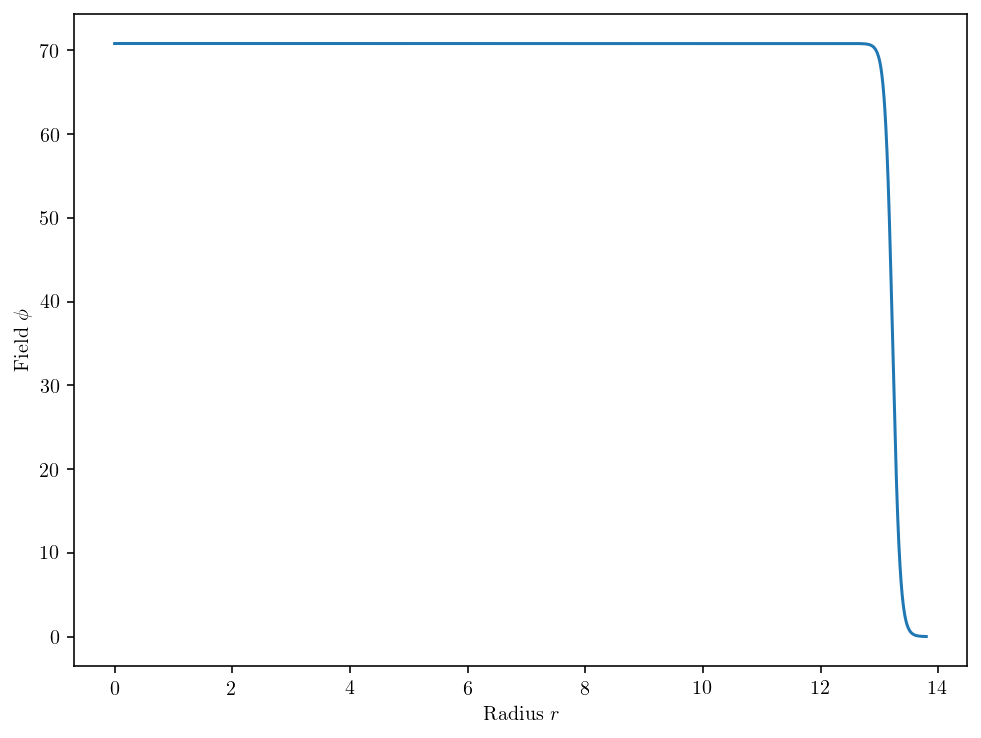

In [6]:
instanton=SingleFieldInstanton(m.htrue, 0.0, m.V0)
phi_profile=instanton.findProfile()

plt.plot(phi_profile.R, phi_profile.Phi)
plt.xlabel(r"Radius $r$")
plt.ylabel(r"Field $\phi$")
plt.show()

In [7]:
instanton.exactSolution(phi_profile.R[0], phi_profile.Phi[0], m.DV(phi_profile.Phi[0]), m.D2V(phi_profile.Phi[0]))

exactSolution_rval(phi=70.82015668649828, dphi=0.0)